# Perla Bot | Analytics
## Correlational and inferential analysis
### Perla beta 2, Aug 2020, raul@psicobotica.com 

<hr>
About Perla: <a herf="https://www.psicobotica.com/productos/psicologia-clinica/psicobotica-perla/">Perla Homepage at Psicobōtica</a>
<hr> 


## Dataset with classes - load from file
(direct load from github)



In [51]:
# Loading the table (CSV)

import pandas as pd 

# Using beta 2 dataset 3 version (with classses): 
perla_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/perla-bot/master/data/Perla-beta2-ds3-classes.csv"

perla_df = pd.read_csv(perla_dataset_path, header=0, delimiter=";") 

In [52]:
# Checking data load
perla_df.head()

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed
0,0,1,0,2,0,0,0,0,0,3,...,0,0,0,0,2,44,4ba596c4aefd8188d00162bfef57967c,0,0,0
1,0,3,3,3,0,3,0,0,0,12,...,3,0,0,0,1,43,fef2bf388aa21eace80757369757689c,1,1,1
2,1,1,1,1,1,0,0,0,0,5,...,0,0,0,0,2,39,00feb0b1986f985dab9ba216069c7bfe,2,0,0
3,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,2,37,b712daeaf10b3aac08eb2a88bae125eb,1,0,0
4,0,0,0,1,0,1,0,0,0,2,...,1,0,0,0,1,43,608af5455da8c250a87f81a5ed5c1942,1,0,0


In [53]:
# Checking types
perla_df.dtypes

PI1            int64
PI2            int64
PI3            int64
PI4            int64
PI5            int64
PI6            int64
PI7            int64
PI8            int64
PI9            int64
PPHQ9          int64
PHQ9           int64
I1             int64
I2             int64
I3             int64
I4             int64
I5             int64
I6             int64
I7             int64
I8             int64
I9             int64
Gender         int64
Age            int64
Code          object
Delay          int64
PDepressed     int64
Depressed      int64
dtype: object

In [54]:
# Check number of qualified successfully anonymized participants
perla_df.Code.count()

105

In [55]:
# Check Nulls and NaNs
perla_df[perla_df.isnull().any(axis=1)]

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed


## Correlational analysis
Considering items scores as continuous variables

In [56]:
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt

### Items correlation

In [57]:
# Correlation matrix for items
# PI(x) are the PHQ-9 items reported by Perla.
# I(x) are the PHQ-9 items self-reported.
items_corr = perla_df[["PI1", "PI2", "PI3", "PI4", "PI5", "PI6", "PI7", "PI8", "PI9",
                      "I1", "I2", "I3", "I4", "I5", "I6", "I7", "I8", "I9"]].corr()

In [58]:
items_corr

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1.000000,0.602354,0.263900,0.479902,0.299255,0.499156,0.350408,0.374775,0.375764,0.636337,0.682074,0.357623,0.534450,0.460811,0.621919,0.458270,0.337586,0.377297
PI2,0.602354,1.000000,0.360973,0.411217,0.299220,0.616376,0.146155,0.408457,0.363971,0.476514,0.692622,0.459561,0.550569,0.412930,0.673812,0.352939,0.321717,0.408977
PI3,0.263900,0.360973,1.000000,0.320373,0.045416,0.388625,0.167650,0.270617,0.036792,0.253966,0.402727,0.786800,0.344911,0.288787,0.362434,0.153833,0.133463,0.155387
PI4,0.479902,0.411217,0.320373,1.000000,0.350344,0.548937,0.234842,0.263057,0.157480,0.454165,0.485312,0.332735,0.681563,0.358778,0.556783,0.292387,0.228151,0.136280
PI5,0.299255,0.299220,0.045416,0.350344,1.000000,0.306171,0.238506,0.320552,0.229075,0.208504,0.356659,0.230596,0.419236,0.621271,0.358428,0.353038,0.480739,0.172298
PI6,0.499156,0.616376,0.388625,0.548937,0.306171,1.000000,0.306309,0.399133,0.385783,0.457453,0.609673,0.482943,0.493273,0.505396,0.759043,0.445301,0.311486,0.401489
PI7,0.350408,0.146155,0.167650,0.234842,0.238506,0.306309,1.000000,0.167233,0.287644,0.375941,0.356440,0.125253,0.291856,0.362458,0.383117,0.644758,0.271962,0.343378
PI8,0.374775,0.408457,0.270617,0.263057,0.320552,0.399133,0.167233,1.000000,0.295587,0.290202,0.351253,0.347181,0.374607,0.454978,0.372020,0.290719,0.460965,0.300952
PI9,0.375764,0.363971,0.036792,0.157480,0.229075,0.385783,0.287644,0.295587,1.000000,0.262799,0.535760,0.117713,0.273033,0.282700,0.487698,0.448152,0.441884,0.855750
I1,0.636337,0.476514,0.253966,0.454165,0.208504,0.457453,0.375941,0.290202,0.262799,1.000000,0.625011,0.290410,0.467116,0.279992,0.514333,0.437695,0.289352,0.319983


In [59]:
cm = sns.light_palette("blue", as_cmap=True)
items_corr.style.background_gradient(cmap=cm).set_precision(2)

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1,0.6,0.26,0.48,0.3,0.5,0.35,0.37,0.38,0.64,0.68,0.36,0.53,0.46,0.62,0.46,0.34,0.38
PI2,0.6,1,0.36,0.41,0.3,0.62,0.15,0.41,0.36,0.48,0.69,0.46,0.55,0.41,0.67,0.35,0.32,0.41
PI3,0.26,0.36,1,0.32,0.045,0.39,0.17,0.27,0.037,0.25,0.4,0.79,0.34,0.29,0.36,0.15,0.13,0.16
PI4,0.48,0.41,0.32,1,0.35,0.55,0.23,0.26,0.16,0.45,0.49,0.33,0.68,0.36,0.56,0.29,0.23,0.14
PI5,0.3,0.3,0.045,0.35,1,0.31,0.24,0.32,0.23,0.21,0.36,0.23,0.42,0.62,0.36,0.35,0.48,0.17
PI6,0.5,0.62,0.39,0.55,0.31,1,0.31,0.4,0.39,0.46,0.61,0.48,0.49,0.51,0.76,0.45,0.31,0.4
PI7,0.35,0.15,0.17,0.23,0.24,0.31,1,0.17,0.29,0.38,0.36,0.13,0.29,0.36,0.38,0.64,0.27,0.34
PI8,0.37,0.41,0.27,0.26,0.32,0.4,0.17,1,0.3,0.29,0.35,0.35,0.37,0.45,0.37,0.29,0.46,0.3
PI9,0.38,0.36,0.037,0.16,0.23,0.39,0.29,0.3,1,0.26,0.54,0.12,0.27,0.28,0.49,0.45,0.44,0.86
I1,0.64,0.48,0.25,0.45,0.21,0.46,0.38,0.29,0.26,1,0.63,0.29,0.47,0.28,0.51,0.44,0.29,0.32


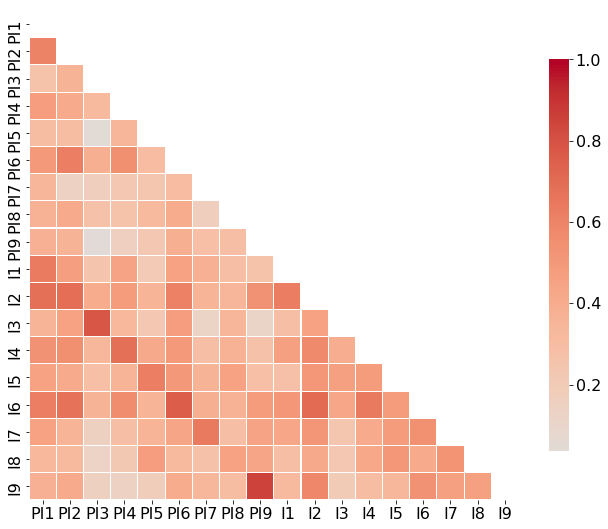

In [60]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(items_corr, dtype=np.bool))

# Set up the matplotlib figure
fig1, ax1 = plt.subplots(figsize=(11, 9))

# cm2 = sns.diverging_palette(380, 1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(items_corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.01, cbar_kws={"shrink": .8})

### Classification Correlation
Considering the dichotimical variable Positive/Negative depression detection

In [61]:
# Point-biserial correlation 
# https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient 
from scipy import stats

stats.pointbiserialr( perla_df["PDepressed"], perla_df["Depressed"] )

PointbiserialrResult(correlation=0.7864170329633562, pvalue=2.7931603148019143e-23)

In [62]:
# One way ANOVA 
stat, p = f_oneway(perla_df["PDepressed"], perla_df["Depressed"])
print('Depression Screening: Statistics=%.3f, p=%.12f' % (stat, p))
# interpret
alpha = 0.001
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Depression Screening: Statistics=1.232, p=0.268279017623
Same distributions (fail to reject H0)


In [63]:
alpha = 0.001
stat, p = f_oneway(perla_df["PI1"], perla_df["I1"])
print('Item 1: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI2"], perla_df["I2"])
print('Item 2: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI3"], perla_df["I3"])
print('Item 3: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI4"], perla_df["I4"])
print('Item 4: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI5"], perla_df["I5"])
print('Item 5: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI6"], perla_df["I6"])
print('Item 6: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI7"], perla_df["I7"])
print('Item 7: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI8"], perla_df["I8"])
print('Item 8: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI9"], perla_df["I9"])
print('Item 9: Statistics=%.3f, p=%.12f' % (stat, p))


Item 1: Statistics=0.115, p=0.734373662137
Item 2: Statistics=0.603, p=0.438263155013
Item 3: Statistics=0.146, p=0.702701326075
Item 4: Statistics=0.589, p=0.443835813865
Item 5: Statistics=0.113, p=0.736713546041
Item 6: Statistics=0.124, p=0.725620806841
Item 7: Statistics=1.392, p=0.239394064375
Item 8: Statistics=6.438, p=0.011903263146
Item 9: Statistics=0.452, p=0.502308408393


## Score comparison and score error
### Mean Absolute Error (MAE) and Error distribution

In [64]:
# Adding the absolute score error as a new column
perla_df['Error'] = perla_df.apply(lambda row: abs(row.PPHQ9 - row.PHQ9), axis=1)

In [67]:
# Absolute error statistics
perla_df['Error'].describe()

count    105.000000
mean       1.866667
std        1.629456
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: Error, dtype: float64

Text(0.5, 1.0, 'Absolute error distribution')

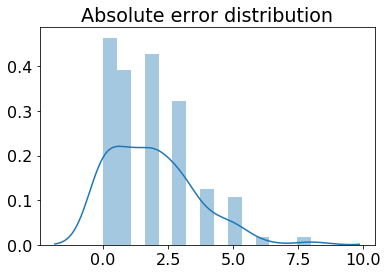

In [68]:
sns.distplot(perla_df[["Error"]], bins=15, kde=True).set_title('Absolute error distribution')

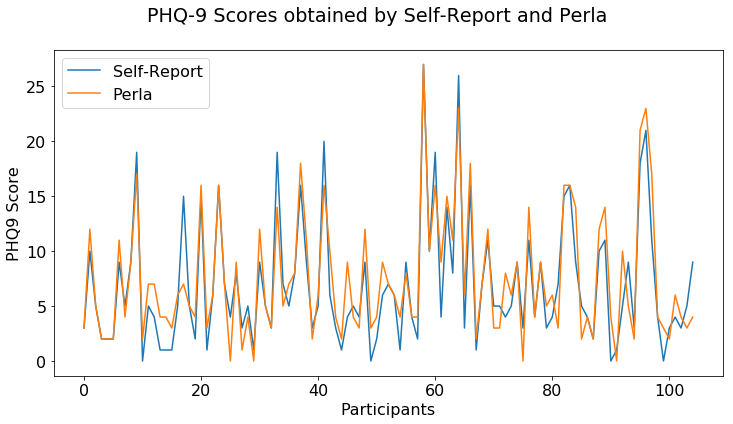

In [81]:
# Visualize as if they were temporal series

fig10, ax10 = plt.subplots(figsize=(12,6))
fig10.suptitle('PHQ-9 Scores obtained by Self-Report and Perla')

ax10.set_ylabel('PHQ9 Score')
ax10.set_xlabel('Participants')

ax10.plot(perla_df['PHQ9'], label='Self-Report')
ax10.plot(perla_df['PPHQ9'], label='Perla')

ax10.legend(loc='upper left', frameon=True)

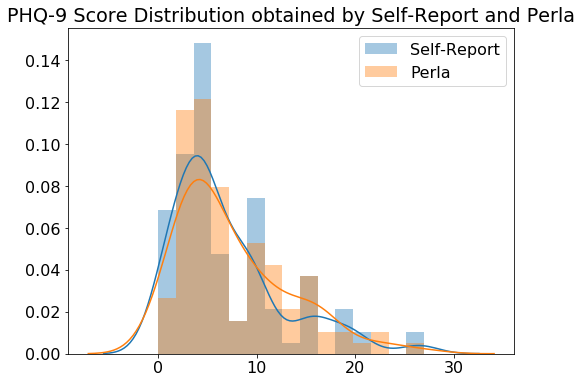

In [94]:
fig11 = plt.subplots(figsize=(8,6))

sns.distplot(perla_df[["PHQ9"]], label='Self-Report', bins=15, kde=True)
sns.distplot(perla_df[["PPHQ9"]], label='Perla', bins=15, kde=True).\
    set_title('PHQ-9 Score Distribution obtained by Self-Report and Perla')

plt.legend()

In [98]:
# Mean error calculation

print("Perla mean error is: %.2f points in relation with standard PHQ9 questionnaire." % perla_df['Error'].mean())

Perla mean error is: 1.87 points in relation with standard PHQ9 questionnaire.


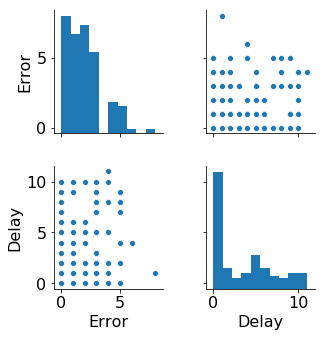

In [99]:
# Does error increase with delay? 

sns.pairplot(perla_df[["Error", "Delay"]])

In [101]:
corr_errdelay = perla_df[["Error", "Delay"]].corr()
corr_errdelay

,Error,Delay
Error,1.000000,0.113864
Delay,0.113864,1.000000


## Evaluation of Perla as Rater 
### Using inter-rater reliability evaluation

Interpretation according to Landis and Koch:<br>
- Values < 0 as indicating no agreement 
- 0–0.20 as slight
- 0.21–0.40 as fair
- 0.41–0.60 as moderate
- 0.61–0.80 as substantial
- 0.81–1 as almost perfect agreement

In [102]:
# Using Cohen Kappa as we only have two raters
from sklearn.metrics import cohen_kappa_score 

cohen_kappa_score( perla_df['PHQ9'], perla_df['PPHQ9'] )


0.19411250364325272

In [ ]:
# Kappa Aprox. 0.20 indicated a slight to fair agreement. 

In [103]:
cohen_kappa_score( perla_df['Depressed'], perla_df['PDepressed'] )

0.7741935483870968

In [ ]:
# Kappa Aprox. 0.77 indicates substantial agreement. 

In [135]:
for i in range(1, 10):
    print("Kappa for item %.1d is: %.2f." % (i, cohen_kappa_score( perla_df['PI'+str(i)], perla_df['I'+str(i)] )))

Kappa for item 1 is: 0.45.
Kappa for item 2 is: 0.41.
Kappa for item 3 is: 0.47.
Kappa for item 4 is: 0.44.
Kappa for item 5 is: 0.44.
Kappa for item 6 is: 0.56.
Kappa for item 7 is: 0.36.
Kappa for item 8 is: 0.31.
Kappa for item 9 is: 0.72.


## Calculate the reliability of Perla
### Using Cronbach's Alpha


In [136]:
# from https://towardsdatascience.com/cronbachs-alpha-theory-and-application-in-python-d2915dd63586 

def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [139]:
# Get a df with Perla item scores
perla_items_df = perla_df[['PI1', 'PI2', 'PI3', 'PI4', 'PI5', 'PI6', 'PI7', 'PI8', 'PI9']]

In [140]:
cronbach_alpha(perla_items_df)

0.8100113912374517

In [141]:
# Get a df with self-report PHQ9 item scores
form_items_df = perla_df[['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']]
cronbach_alpha(form_items_df)

0.8781437717111187

## Evaluation of Perla as classifier
Using signal detection theory

In [106]:
# Confusion matrix for depression screening

confusion_matrix_perla = pd.crosstab(perla_df['Depressed'], 
                               perla_df['PDepressed'], 
                               rownames=['Actual (PHQ9)'], 
                               colnames=['Predicted (Perla)'])

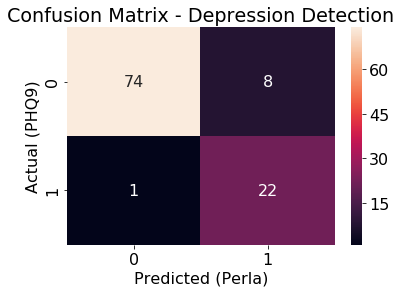

In [107]:
plt.rcParams.update({'font.size': 16})
ax = plt.subplot()
sns.heatmap(confusion_matrix_perla, annot=True, ax = ax)
ax.set_title('Confusion Matrix - Depression Detection'); 

In [108]:
# Confusion matrix statistics: 

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(perla_df['Depressed'], perla_df['PDepressed']).ravel()
(tn, fp, fn, tp)

(74, 8, 1, 22)

In [109]:
# Accuracy of Perla as classifier

from sklearn.metrics import accuracy_score 

# accuracy_score(y_true, y_pred)
acc = accuracy_score(perla_df['Depressed'], perla_df['PDepressed'])
print("The accuracy of Perla is: " + str(acc))

The accuracy of Perla is: 0.9142857142857143


In [110]:
# F1 Score

from sklearn.metrics import f1_score

# f1_score(y_true, y_pred, average='binary')
f1_score(perla_df['Depressed'], perla_df['PDepressed'], average='binary')

0.8301886792452831

In [111]:
# Classification report

from sklearn.metrics import classification_report
target_names = ['No Depression', 'Depression']
print(classification_report(perla_df['Depressed'], perla_df['PDepressed'], target_names=target_names))

               precision    recall  f1-score   support

No Depression       0.99      0.90      0.94        82
   Depression       0.73      0.96      0.83        23

    micro avg       0.91      0.91      0.91       105
    macro avg       0.86      0.93      0.89       105
 weighted avg       0.93      0.91      0.92       105



In [112]:
# AUC - Area under the ROC curve

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(perla_df['Depressed'], perla_df['PDepressed'])
print(roc_auc)

0.9294803817603394


In [113]:
# Perla probability of depression
# y = 1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874)^3.96744)
# 4PL symmetrical sigmoidal

def proba(x):
    return  1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874) ** 3.96744)

In [114]:
# Plot ROC curve

from sklearn.metrics import roc_curve

perla_df['probas'] = perla_df.apply(lambda row: proba(row.PPHQ9), axis=1)

fpr, tpr, thresholds = roc_curve(perla_df['Depressed'], perla_df['probas'], pos_label=0)


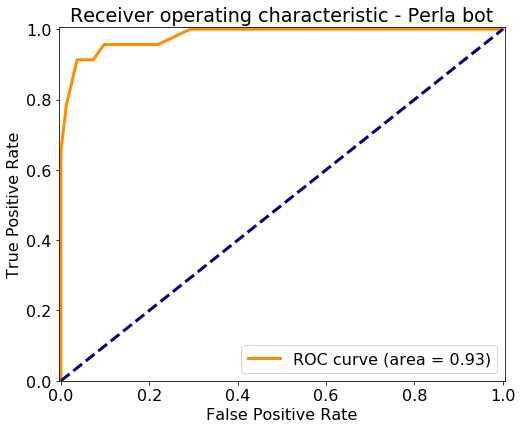

In [115]:
plt.figure(figsize=(8,6.5))
lw = 3

plt.plot(tpr, fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Perla bot')
plt.legend(loc="lower right")
plt.show()

### Classifier evaluation for each item

In [116]:
confusion_matrix_item1 = pd.crosstab(perla_df['I1'], 
                               perla_df['PI1'], 
                               rownames=['Item 1'], 
                               colnames=['Predicted I1'])

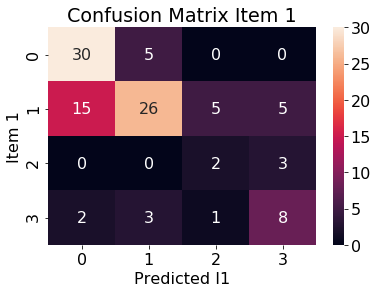

In [117]:
ax1 = plt.subplot()
sns.heatmap(confusion_matrix_item1, annot=True, ax = ax1)
ax1.set_title('Confusion Matrix Item 1');

In [118]:
acc1 = accuracy_score(perla_df['I1'], perla_df['PI1'])
print("The accuracy for item 1 is: " + str(acc1))

The accuracy for item 1 is: 0.6285714285714286


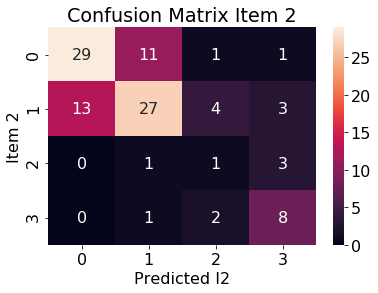

In [119]:
confusion_matrix_item2 = pd.crosstab(perla_df['I2'], 
                               perla_df['PI2'], 
                               rownames=['Item 2'], 
                               colnames=['Predicted I2'])
ax2 = plt.subplot()
sns.heatmap(confusion_matrix_item2, annot=True, ax = ax2)
ax2.set_title('Confusion Matrix Item 2');

In [120]:
acc2 = accuracy_score(perla_df['I2'], perla_df['PI2'])
print("The accuracy for item 2 is: " + str(acc2))

The accuracy for item 2 is: 0.6190476190476191


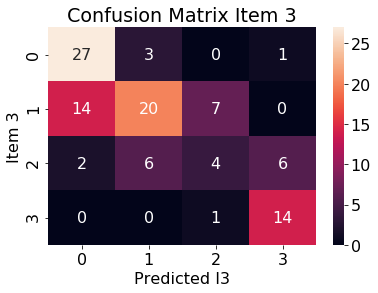

In [121]:
confusion_matrix_item3 = pd.crosstab(perla_df['I3'], 
                               perla_df['PI3'], 
                               rownames=['Item 3'], 
                               colnames=['Predicted I3'])
ax3 = plt.subplot()
sns.heatmap(confusion_matrix_item3, annot=True, ax = ax3)
ax3.set_title('Confusion Matrix Item 3');

In [122]:
acc3 = accuracy_score(perla_df['I3'], perla_df['PI3'])
print("The accuracy for item 3 is: " + str(acc3))

The accuracy for item 3 is: 0.6190476190476191


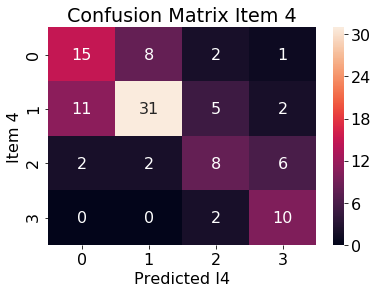

In [123]:
confusion_matrix_item4 = pd.crosstab(perla_df['I4'], 
                               perla_df['PI4'], 
                               rownames=['Item 4'], 
                               colnames=['Predicted I4'])
ax4 = plt.subplot()
sns.heatmap(confusion_matrix_item4, annot=True, ax = ax4)
ax4.set_title('Confusion Matrix Item 4');

In [124]:
acc4 = accuracy_score(perla_df['I4'], perla_df['PI4'])
print("The accuracy for item 4 is: " + str(acc4))

The accuracy for item 4 is: 0.6095238095238096


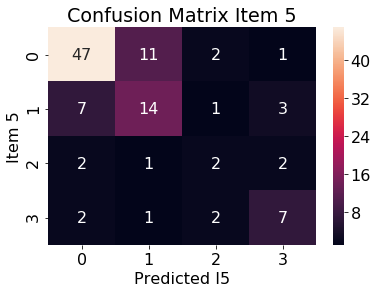

In [125]:
confusion_matrix_item5 = pd.crosstab(perla_df['I5'], 
                               perla_df['PI5'], 
                               rownames=['Item 5'], 
                               colnames=['Predicted I5'])
ax5 = plt.subplot()
sns.heatmap(confusion_matrix_item5, annot=True, ax = ax5)
ax5.set_title('Confusion Matrix Item 5');

In [126]:
acc5 = accuracy_score(perla_df['I5'], perla_df['PI5'])
print("The accuracy for item 5 is: " + str(acc5))

The accuracy for item 5 is: 0.6666666666666666


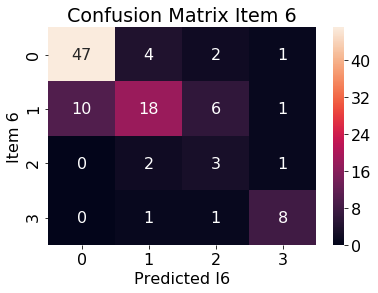

In [127]:
confusion_matrix_item6 = pd.crosstab(perla_df['I6'], 
                               perla_df['PI6'], 
                               rownames=['Item 6'], 
                               colnames=['Predicted I6'])
ax6 = plt.subplot()
sns.heatmap(confusion_matrix_item6, annot=True, ax = ax6)
ax6.set_title('Confusion Matrix Item 6');

In [128]:
acc6 = accuracy_score(perla_df['I6'], perla_df['PI6'])
print("The accuracy for item 6 is: " + str(acc6))

The accuracy for item 6 is: 0.7238095238095238


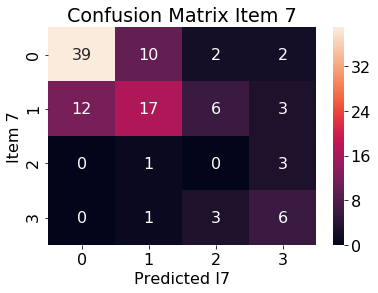

In [129]:
confusion_matrix_item7 = pd.crosstab(perla_df['I7'], 
                               perla_df['PI7'], 
                               rownames=['Item 7'], 
                               colnames=['Predicted I7'])
ax7 = plt.subplot()
sns.heatmap(confusion_matrix_item7, annot=True, ax = ax7)
ax7.set_title('Confusion Matrix Item 7');

In [130]:
acc7 = accuracy_score(perla_df['I7'], perla_df['PI7'])
print("The accuracy for item 7 is: " + str(acc7))

The accuracy for item 7 is: 0.5904761904761905


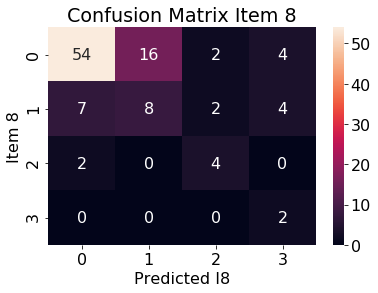

In [131]:
confusion_matrix_item8 = pd.crosstab(perla_df['I8'], 
                               perla_df['PI8'], 
                               rownames=['Item 8'], 
                               colnames=['Predicted I8'])
ax8 = plt.subplot()
sns.heatmap(confusion_matrix_item8, annot=True, ax = ax8)
ax8.set_title('Confusion Matrix Item 8');

In [132]:
acc8 = accuracy_score(perla_df['I8'], perla_df['PI8'])
print("The accuracy for item 8 is: " + str(acc8))

The accuracy for item 8 is: 0.6476190476190476


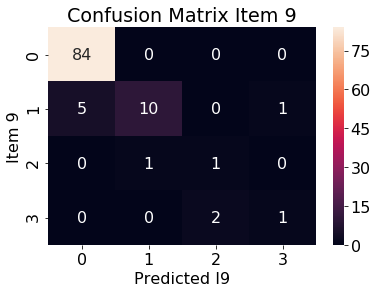

In [133]:
confusion_matrix_item9 = pd.crosstab(perla_df['I9'], 
                               perla_df['PI9'], 
                               rownames=['Item 9'], 
                               colnames=['Predicted I9'])
ax9 = plt.subplot()
sns.heatmap(confusion_matrix_item9, annot=True, ax = ax9)
ax9.set_title('Confusion Matrix Item 9');

In [134]:
acc9 = accuracy_score(perla_df['I9'], perla_df['PI9'])
print("The accuracy for item 9 is: " + str(acc9))

The accuracy for item 9 is: 0.9142857142857143
